In [1]:
#Importing necessary liberies needed to analyze the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#At this point we are loading the already downloaded dataset to a dataframe 
data = pd.read_csv(r"C:\Users\hp pc\diabetes model\diabetes.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


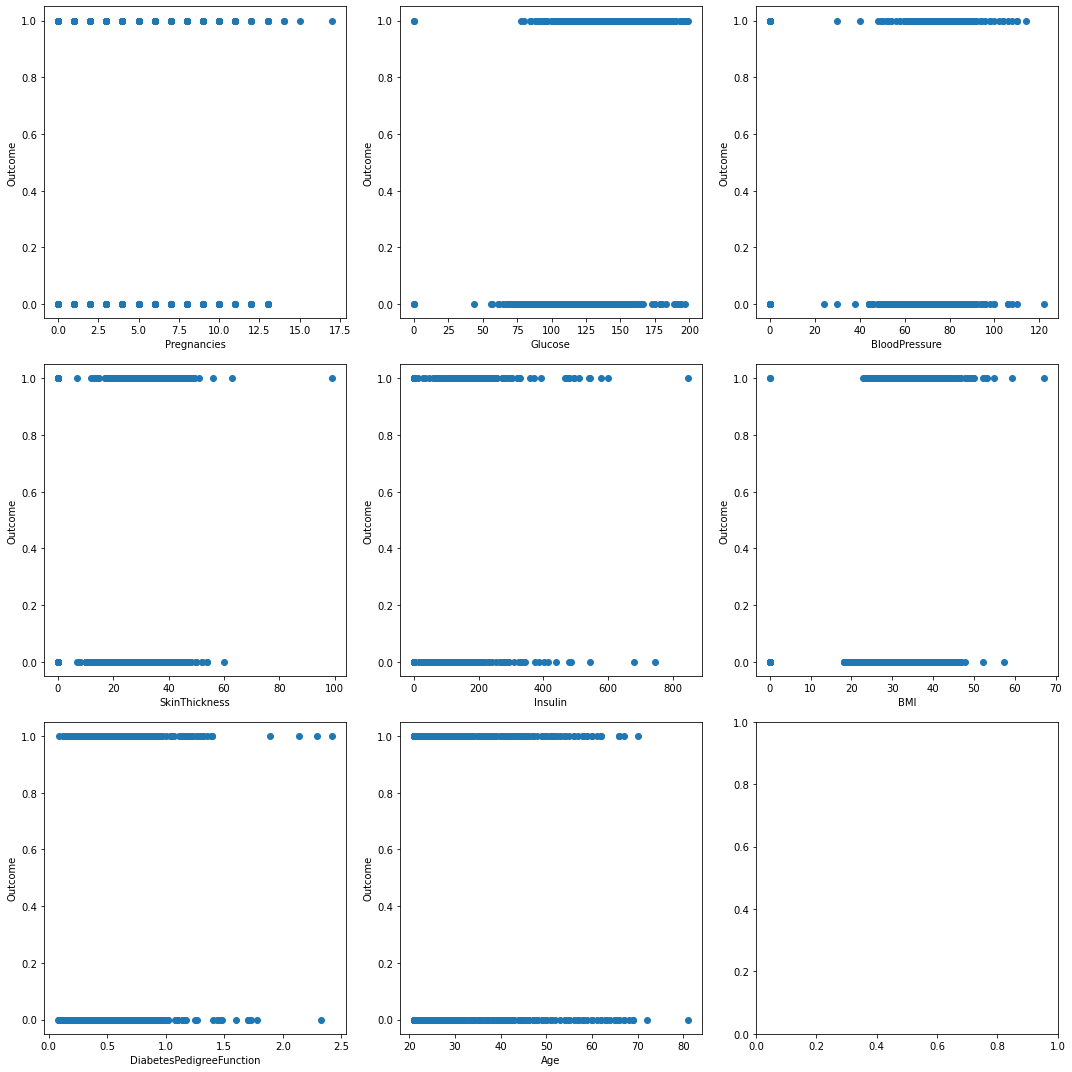

In [7]:
colums_data = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
               'DiabetesPedigreeFunction', 'Age']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for v, column in enumerate(colums_data):
    row = v // 3
    loc_num = v % 3
    
    axs[row, loc_num].scatter(data[column], data['Outcome'])
    axs[row, loc_num].set_xlabel(column)
    axs[row, loc_num].set_ylabel('Outcome')

plt.tight_layout()
plt.show()

In [8]:
data[['BloodPressure','Glucose','SkinThickness','Insulin','BMI']] = data[['BloodPressure',
                                                            'Glucose','SkinThickness','Insulin','BMI']].replace(0, np.NaN)


In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [10]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
# assigning the mean value as the missing values  of each column

clean_data = data.copy()

clean_data["BloodPressure"].fillna(data["BloodPressure"].mean(), inplace=True)
clean_data["Glucose"].fillna(data["Glucose"].mean(), inplace=True)
clean_data["SkinThickness"].fillna(data["SkinThickness"].mean(), inplace=True)
clean_data["Insulin"].fillna(data["Insulin"].mean(), inplace=True)
clean_data["BMI"].fillna(data["BMI"].mean(), inplace=True)

In [12]:
clean_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [14]:
clean_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
clean_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

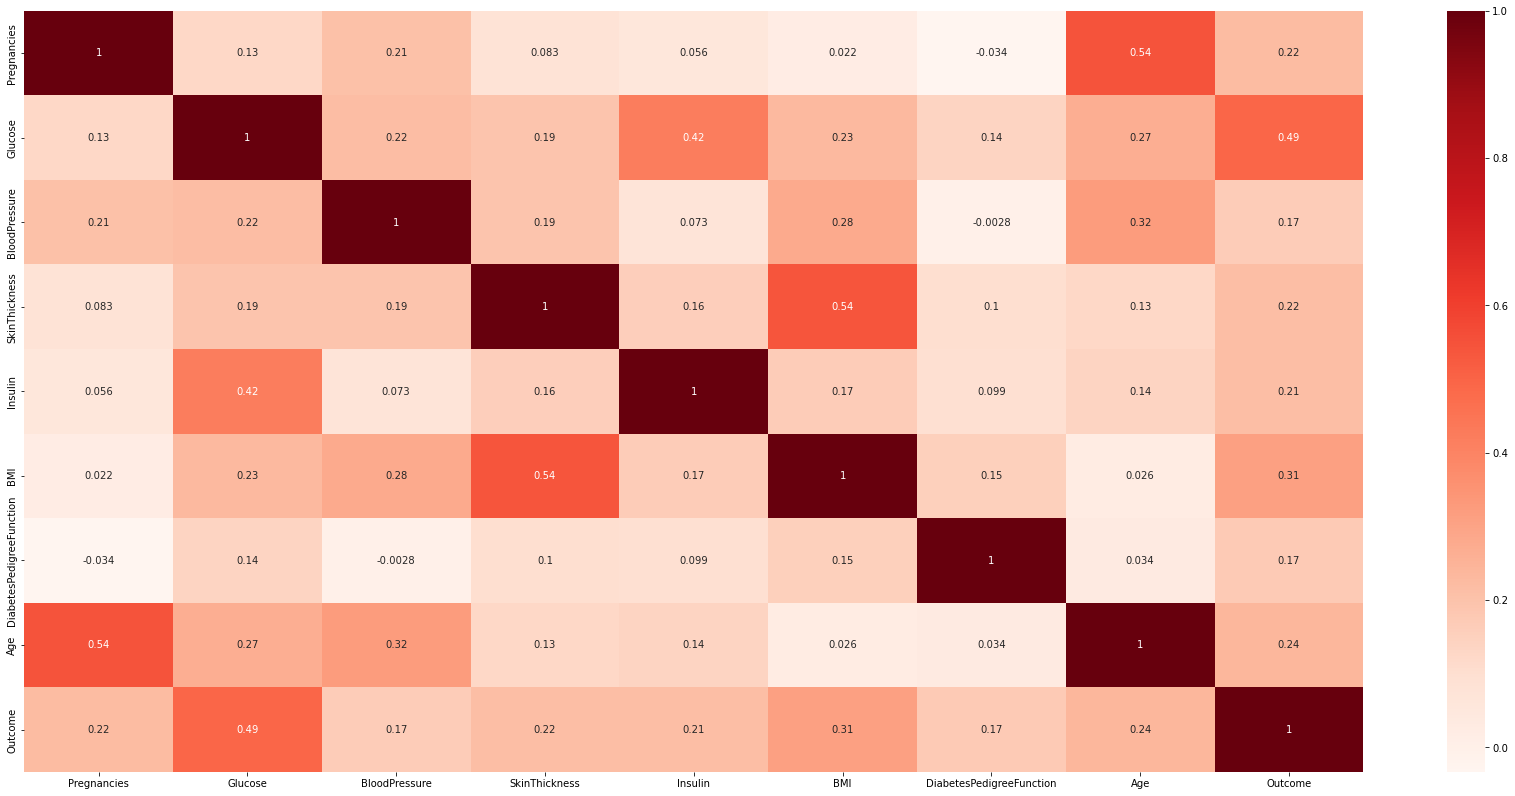

In [16]:
plt.figure(figsize=(30,14))
sns.heatmap(clean_data.corr(),annot=True,cmap='Reds')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

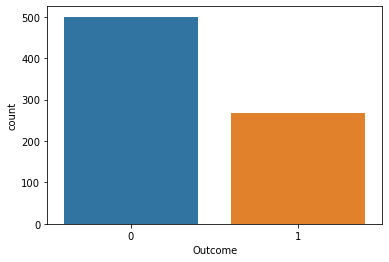

In [17]:
sns.countplot(data=clean_data, x='Outcome')

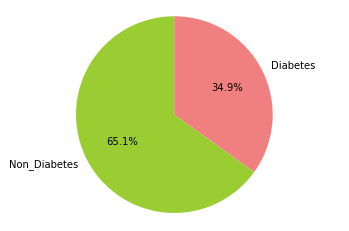

In [18]:
labels = ['Non_Diabetes', 'Diabetes']
sizes = [len(clean_data[clean_data['Outcome'] == 0]), len(clean_data[clean_data['Outcome'] == 1])]
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

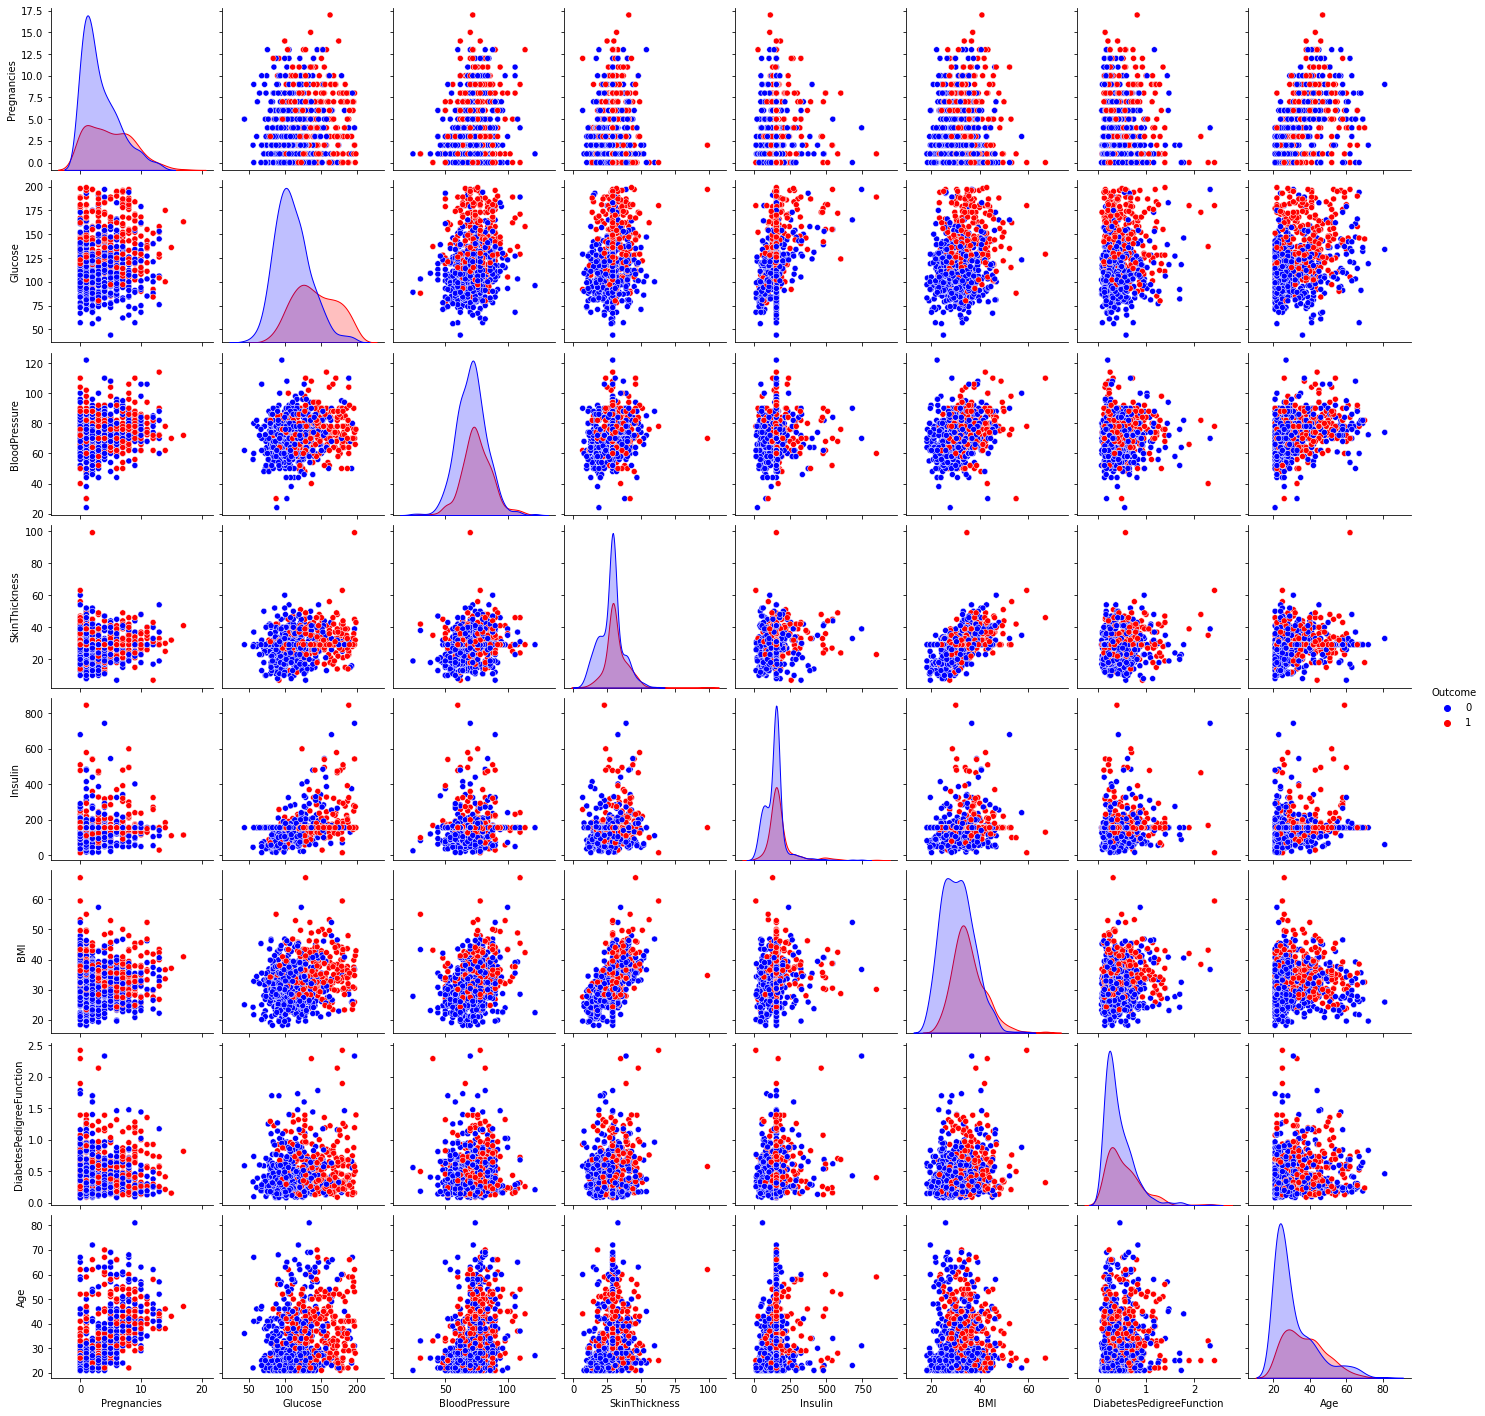

In [19]:
import seaborn as sns
my_palette = {0: 'blue', 1: 'red'}

# Create the pairplot
sns.pairplot(clean_data, hue='Outcome', palette=my_palette)

# Show the plot
plt.show()


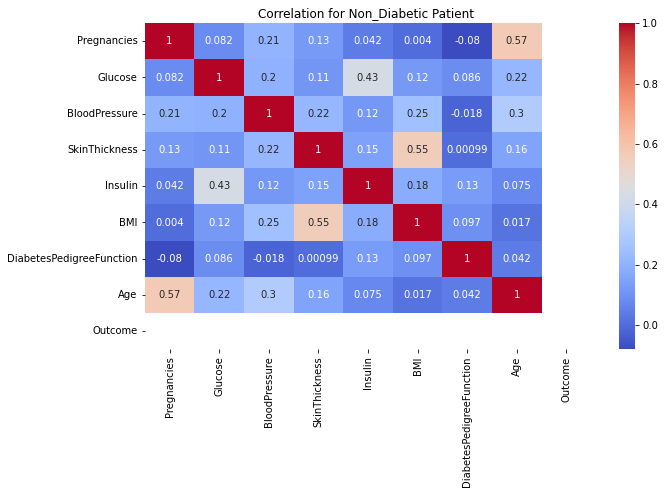

In [20]:
from scipy.spatial.distance import pdist, squareform

# Split the data into benign and malignant classes
non_diabetic = clean_data[clean_data['Outcome'] == 0]
diabetic = clean_data[clean_data['Outcome'] == 1]

# Create a heatmap for benign data
plt.figure(figsize=(10,6))
sns.heatmap(non_diabetic.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation for Non_Diabetic Patient ')
plt.show()


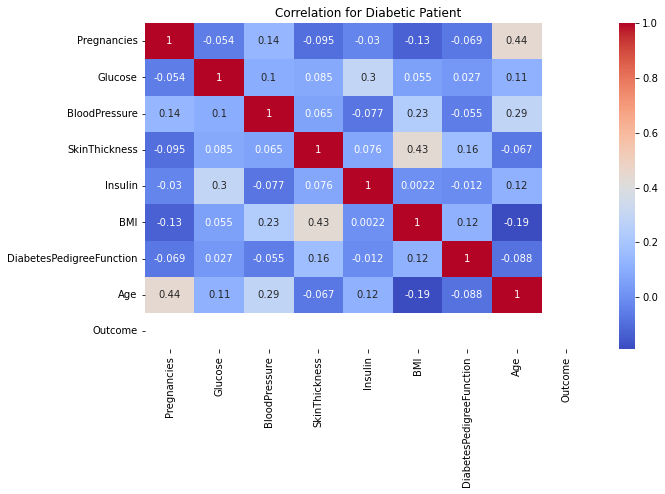

In [21]:
# Compute the correlation matrix
corr_matrix = diabetic.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation for Diabetic Patient')
plt.show()

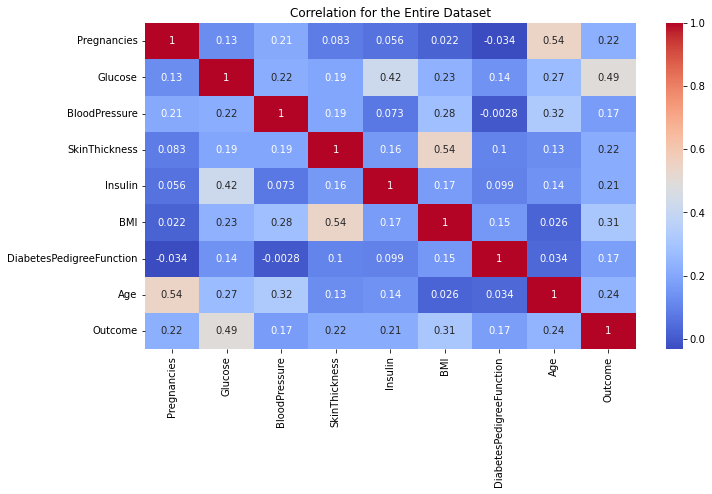

In [22]:
corr_matrix = clean_data.corr()
plt.figure(figsize=(11, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation for the Entire Dataset')
plt.show()

# Data Scaling

In [23]:
# checking the distribution of Target Variable
clean_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
clean_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


In [25]:
# separating the data and labels
X = clean_data.drop(columns = 'Outcome', axis=1)
Y = clean_data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [26]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333


In [27]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [28]:
#Splitting Data into Training data & Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


# MODEL TRANNING AND EVALUATION

SUPPORT VECTOR MACHINE

In [29]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=0)

In [30]:
# accuracy on training data
X_train_prediction1 = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction1, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7728119180633147


In [31]:
# accuracy on test data
X_test_prediction1 = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction1, Y_test)
print("Support Vector Machine(SVM) ")
print("accuracy is ",accuracy_score(X_test_prediction1,Y_test))
print ("precision is ",precision_score(X_test_prediction1,Y_test))
print("recall is ",recall_score(X_test_prediction1,Y_test))
print("f1 is ",f1_score(X_test_prediction1,Y_test))

Support Vector Machine(SVM) 
accuracy is  0.7575757575757576
precision is  0.4605263157894737
recall is  0.7
f1 is  0.5555555555555555


# RANDOM FOREST

In [32]:
RF= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
RF.fit(X_train, Y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [33]:
X_train_prediction2 =RF.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction2, Y_train)
print('Accuracy on Training data : ', training_data_accuracy) 

Accuracy on Training data :  0.9906890130353817


In [34]:
# random forest 
RF_pred = RF.predict(X_test)
print("Random Forest ")
print("accuracy is ",accuracy_score(RF_pred,Y_test))
print ("precision is ",precision_score(RF_pred,Y_test))
print("recall is ",recall_score(RF_pred,Y_test))
print("f1 is ",f1_score(RF_pred,Y_test))


Random Forest 
accuracy is  0.7445887445887446
precision is  0.5
recall is  0.6440677966101694
f1 is  0.5629629629629629
